In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
fn = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [9]:
df = pd.read_json(fn, orient = 'split')

In [11]:
df.head()

,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID
0,10796,1983,2,30.449124,0.449124,0.898249,"[1983.07.22, 1983.07.23]","[0.283854, 0.614395]","[30.283854, 30.614395000000002]",UID-0
1,10796,1983,2,30.628260,0.628260,1.256520,"[1983.07.26, 1983.07.27]","[0.752293, 0.504227]","[30.752293, 30.504227]",UID-1
2,10796,1983,1,30.676840,0.676840,0.676840,[1983.08.03],[0.6768400000000001],[30.67684],UID-2
3,10796,1984,1,30.138933,0.138933,0.138933,[1984.08.01],[0.138933],[30.138933],UID-3
4,10796,1984,2,31.393755,1.393755,2.787509,"[1984.08.05, 1984.08.06]","[1.297869, 1.48964]","[31.297869, 31.48964]",UID-4


In [12]:
# Dehli 6955, Kolkata 9691

In [32]:
def mk_data(df, id_):
    data = df[df['ID_HDC_G0'] == id_][['year','duration']].groupby('year').sum()
    pd.DataFrame(data.reset_index(inplace = True))
    
    return data

In [33]:
dehli = mk_data(df, 6955)
kolkata = mk_data(df, 9691)

Text(0, 0.5, 'days/yr wbgt-max > 30°C')

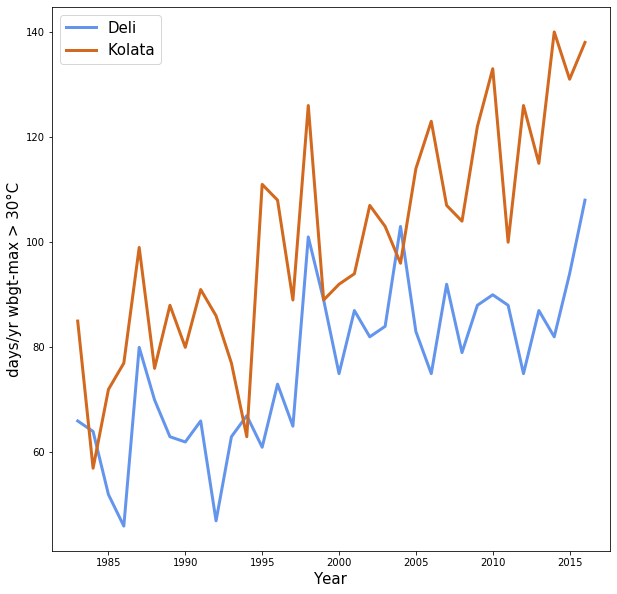

In [45]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.plot(dehli['year'], dehli['duration'], color = 'cornflowerblue', linewidth = 3)
plt.plot(kolkata['year'], kolkata['duration'], color = 'chocolate', linewidth = 3)
plt.legend(['Deli','Kolata'], fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('days/yr wbgt-max > 30°C', fontsize = 15)

In [49]:
#### Args
DATA = 'wbgt30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [50]:
FN_STATS

'/scratch/cascade/UEH-daily/stats/wbgt30_STATS.json'

In [65]:
FN_STATS = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [66]:
stats = pd.read_json(FN_STATS, orient = 'split') # read in stats
df_pop = pd.read_csv(FN_POP) # read in interp population from GHS-UCDB

In [67]:
len(np.unique(stats['ID_HDC_G0']))

8960

In [68]:
stats

,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID
0,10796,1983,2,30.449124,0.449124,0.898249,"[1983.07.22, 1983.07.23]","[0.283854, 0.614395]","[30.283854, 30.614395000000002]",UID-0
1,10796,1983,2,30.628260,0.628260,1.256520,"[1983.07.26, 1983.07.27]","[0.752293, 0.504227]","[30.752293, 30.504227]",UID-1
2,10796,1983,1,30.676840,0.676840,0.676840,[1983.08.03],[0.6768400000000001],[30.67684],UID-2
3,10796,1984,1,30.138933,0.138933,0.138933,[1984.08.01],[0.138933],[30.138933],UID-3
4,10796,1984,2,31.393755,1.393755,2.787509,"[1984.08.05, 1984.08.06]","[1.297869, 1.48964]","[31.297869, 31.48964]",UID-4
...,...,...,...,...,...,...,...,...,...,...
382,9915,2016,9,30.981894,0.981894,8.837046,"[2016.08.17, 2016.08.18, 2016.08.19, 2016.08.2...","[1.978024, 0.8506900000000001, 0.5243639999999...","[31.978024, 30.85069, 30.524364, 30.866304, 30...",UID-2524336
383,9915,2016,3,30.834181,0.834181,2.502543,"[2016.08.27, 2016.08.28, 2016.08.29]","[1.6507, 0.43391399999999997, 0.417929]","[31.6507, 30.433914, 30.417929]",UID-2524337
384,9915,2016,1,30.409330,0.409330,0.409330,[2016.09.06],[0.40933],[30.40933],UID-2524338
385,9915,2016,1,30.470387,0.470387,0.470387,[2016.09.08],[0.470387],[30.470387],UID-2524339


In [64]:
def tot_days(df):
    """ Calulates the total number of days per year when a heat threshold was met
    """
    df_out = df[['ID_HDC_G0','year','duration']].groupby(['ID_HDC_G0','year']).sum().reset_index()
    df_out.rename(columns={'duration':'tot_days'}, inplace=True)
    
    return df_out

In [69]:
#### Args
DATA = 'wbgtmax30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [70]:
df = pd.read_json(FN_OUT, orient = 'split')

In [71]:
df

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop
0,18,2006,2,622283.428656,494664.495616,661553.577433,1.244567e+06,989328.991233,255237.866079
1,22,2006,2,70915.650551,52064.452435,73006.671133,1.418313e+05,104128.904869,37702.396233
2,26,2006,3,247944.032154,194088.886834,268055.635628,7.438321e+05,582266.660503,161565.435959
3,27,2006,2,90805.062622,80540.779940,93335.494324,1.816101e+05,161081.559880,20528.565365
4,28,1998,1,68062.052369,59320.971209,91449.606255,6.806205e+04,59320.971209,8741.081160
...,...,...,...,...,...,...,...,...,...
63602,13135,2010,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63603,13135,2011,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63604,13135,2012,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63605,13135,2013,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000


In [72]:
fn = '/scratch/cascade/UEH-daily/stats/wbgtmax30_TREND_EXP05.json'

In [73]:
df = pd.read_json(fn, orient = 'split')

In [74]:
df

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop
0,18,2006,2,622283.428656,494664.495616,661553.577433,1.244567e+06,989328.991233,255237.866079
1,22,2006,2,70915.650551,52064.452435,73006.671133,1.418313e+05,104128.904869,37702.396233
2,26,2006,3,247944.032154,194088.886834,268055.635628,7.438321e+05,582266.660503,161565.435959
3,27,2006,2,90805.062622,80540.779940,93335.494324,1.816101e+05,161081.559880,20528.565365
4,28,1998,1,68062.052369,59320.971209,91449.606255,6.806205e+04,59320.971209,8741.081160
...,...,...,...,...,...,...,...,...,...
63602,13135,2010,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63603,13135,2011,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63604,13135,2012,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
63605,13135,2013,0,NaN,132501.788370,132501.788370,0.000000e+00,0.000000,0.000000
